In [1]:
import torch
import torchvision
from torchvision import transforms, models
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, ConcatDataset, random_split, Subset
from copy import deepcopy
from timm.data.loader import create_loader
from matplotlib import pyplot as plt
import numpy as np
from timm.data.mixup import Mixup
import warnings

warnings.filterwarnings("ignore")

from torchtoolbox.transform import Cutout

/root/miniconda3/envs/cc_pyg_1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_transform_origin = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
])

image_transform_cutout = transforms.Compose([
        Cutout(scale=(1/16, 1/16), p=1.0, ratio=(1,1), value=(0,1), pixel_level=True),
        transforms.ToTensor()
])

In [3]:
train_origin = torchvision.datasets.CIFAR100(root='data', train=True, download=False)
train_cutout = torchvision.datasets.CIFAR100(root='data', transform=image_transform_cutout, train=True, download=False)

# Cutout

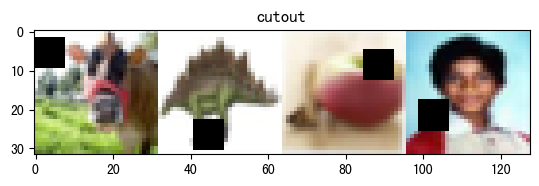

In [4]:
loader = DataLoader(train_cutout, 4)
inputs, classes = next(iter(loader))
plt.title('cutout')
plt.imshow(np.transpose(torchvision.utils.make_grid(inputs, padding = 0),(1, 2, 0)))

# Mixup

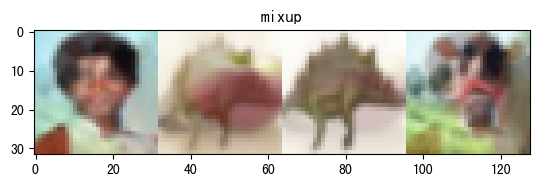

In [7]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
loader = create_loader(train_origin, batch_size=4, input_size=(3,32,32), use_prefetcher=False)
inputs, targets = next(iter(loader))

mixup_args = {
    'mixup_alpha': 1,
    'cutmix_alpha': 0.,
    'cutmix_minmax': None,
    'prob': 0.5,
    'switch_prob': 0,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 100}
mixup_fn = Mixup(**mixup_args)


inputs, targets = mixup_fn(inputs, targets)
out = torchvision.utils.make_grid(inputs, padding=0)
out = np.transpose(out, (1, 2, 0))
out = out * std + mean
plt.title('mixup')
plt.imshow(out)




# Cutmix

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


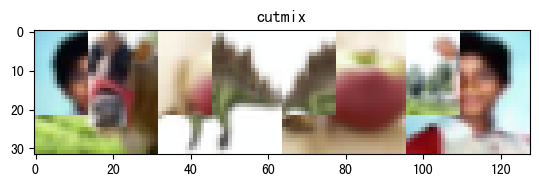

In [6]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
loader = create_loader(train_origin, batch_size=4, input_size=(3,32,32), use_prefetcher=False)
inputs, targets = next(iter(loader))

mixup_args = {
    'mixup_alpha': 0.,
    'cutmix_alpha': 1,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 100}
mixup_fn = Mixup(**mixup_args)

inputs, targets = mixup_fn(inputs, targets)
out = torchvision.utils.make_grid(inputs, padding=0)
out = np.transpose(out, (1, 2, 0))
out = out * std + mean
plt.title('cutmix')
plt.imshow(out)

